In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

### 삼성전자

In [62]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/daily-min-temperatures.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8

In [63]:
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8

In [64]:
ts1 = df['Temp']
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

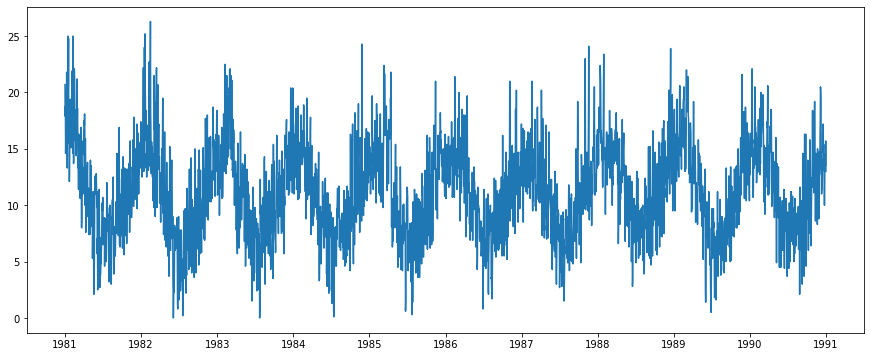

In [65]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

# time series 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

In [66]:
ts1[ts1.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Temp, dtype: float64)

In [67]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts1=ts1.interpolate(method='time')
ts1[ts1.isna()]    # 다시 NaN 확인

Series([], Name: Temp, dtype: float64)

In [68]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


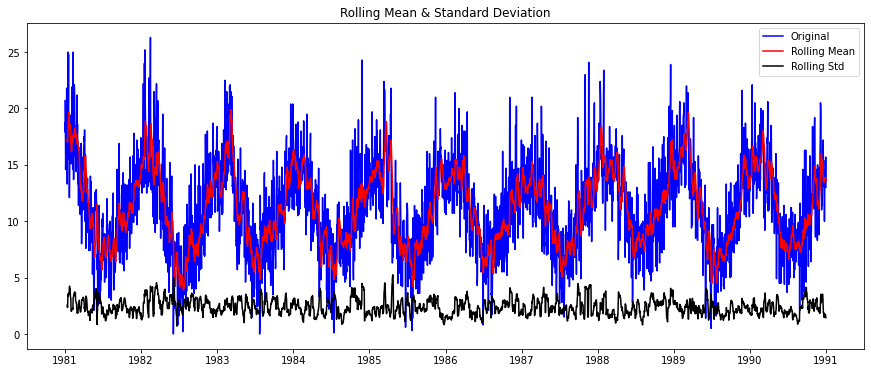

In [69]:
plot_rolling_statistics(ts1, window=12)

In [70]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/airline-passengers.csv' 
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)  
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

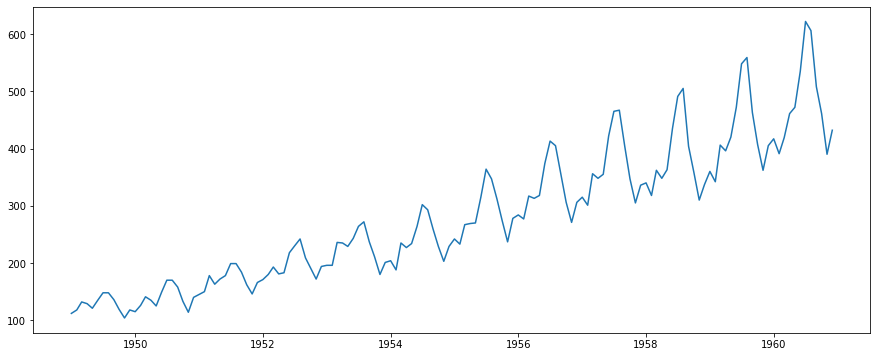

In [71]:
ts2 = df['Passengers']
plt.plot(ts2)

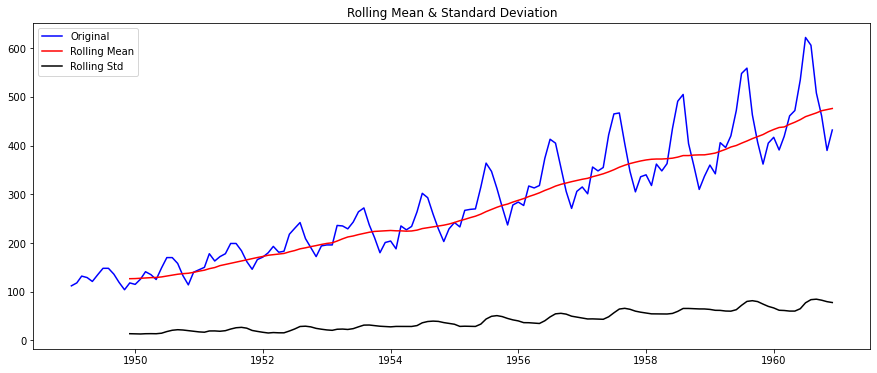

In [72]:
plot_rolling_statistics(ts2, window=12)

In [73]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [74]:
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


In [75]:
augmented_dickey_fuller_test(ts2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


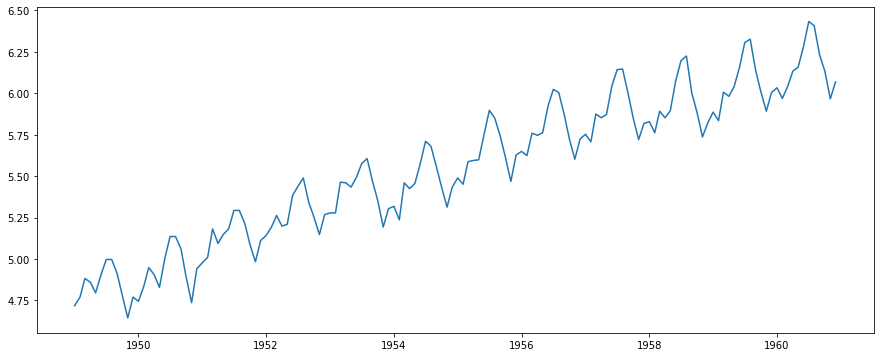

In [76]:
ts_log = np.log(ts2)
plt.plot(ts_log)

In [77]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


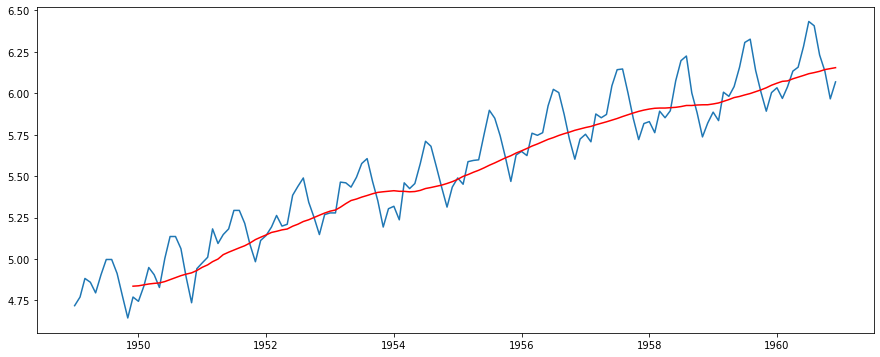

In [78]:
moving_avg = ts_log.rolling(window=12).mean()  # moving average를 구해서 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [79]:
ts_log_moving_avg = ts_log - moving_avg
ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

In [80]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

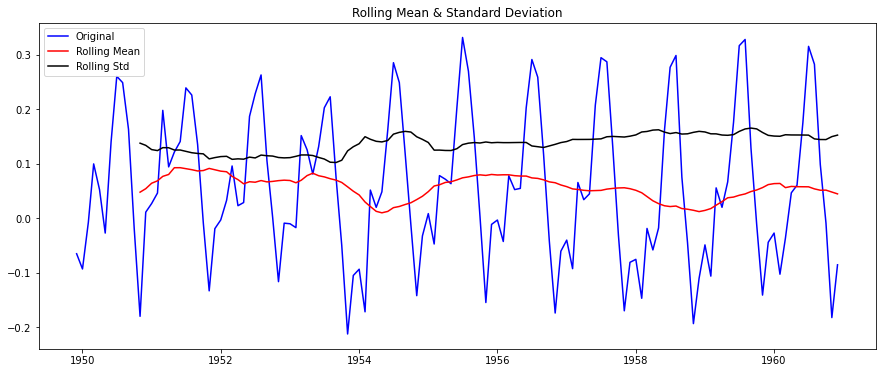

In [81]:
plot_rolling_statistics(ts_log_moving_avg)

In [82]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [83]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)

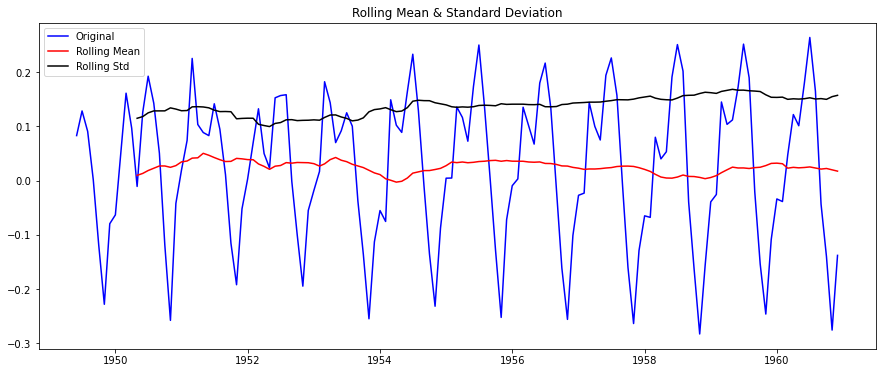

In [84]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [85]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                  -2.273822
p-value                          0.180550
#Lags Used                      14.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


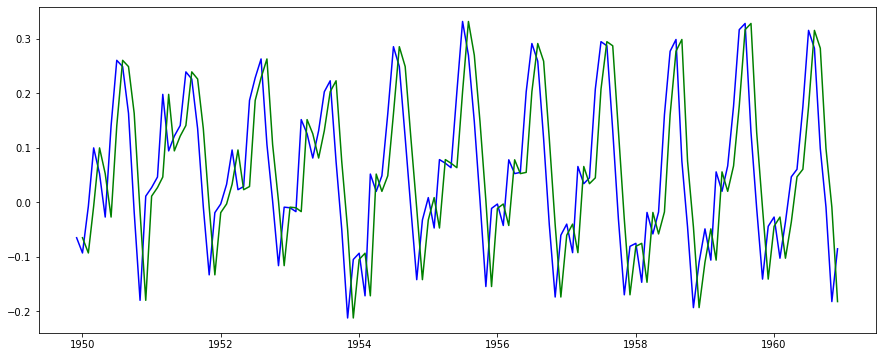

In [86]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

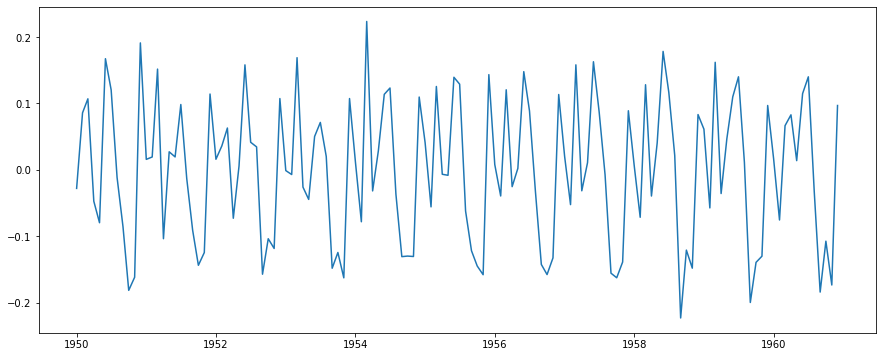

In [87]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

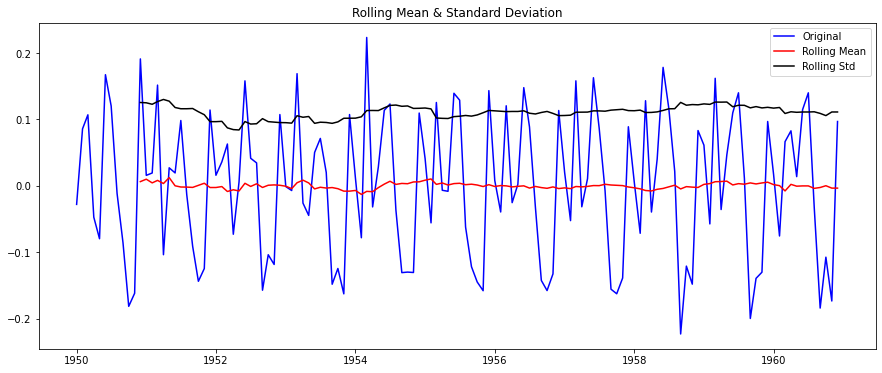

In [88]:
plot_rolling_statistics(ts_log_moving_avg_diff)

In [89]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


In [90]:
ts_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: Passengers, dtype: float64

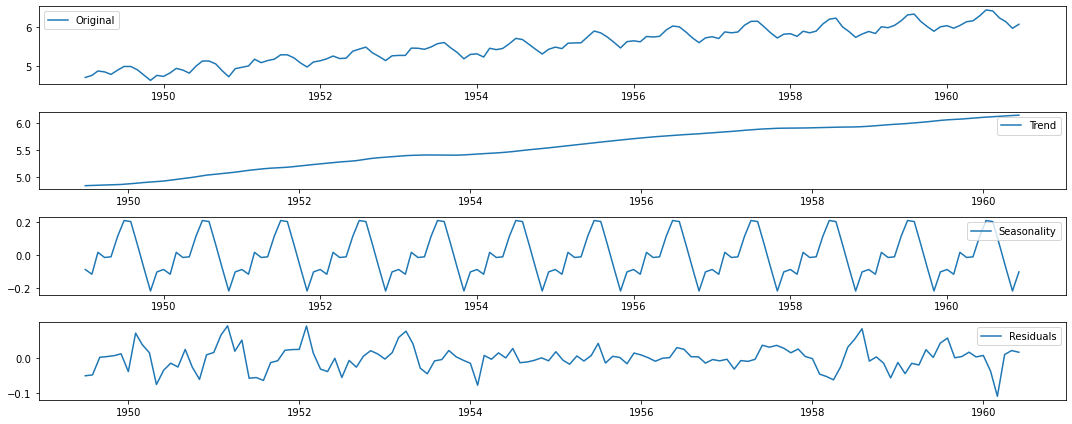

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

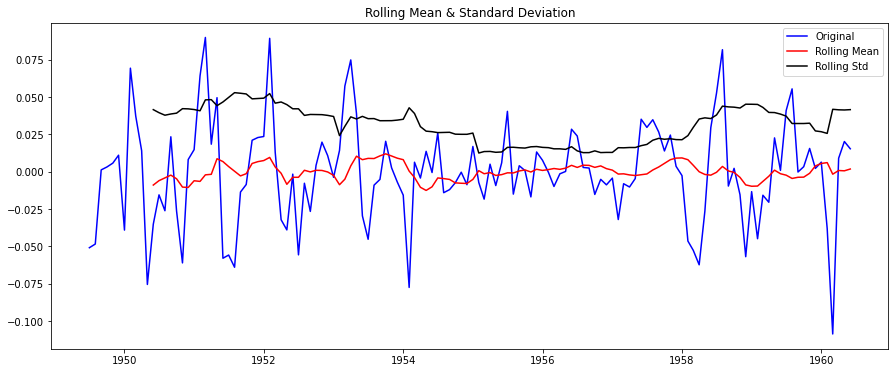

In [92]:
plot_rolling_statistics(residual)

In [93]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


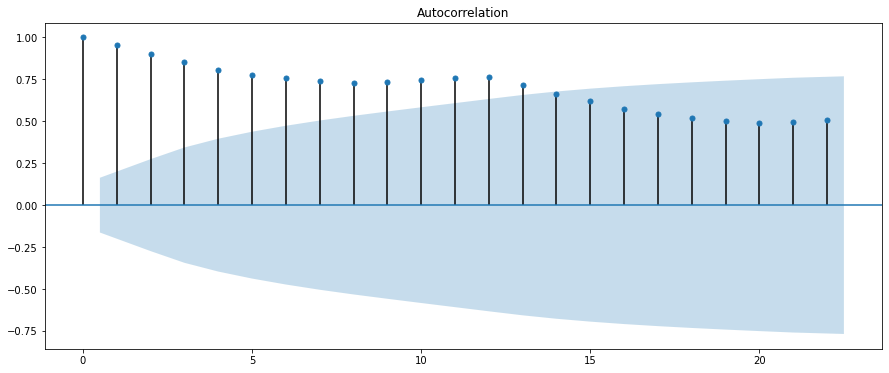

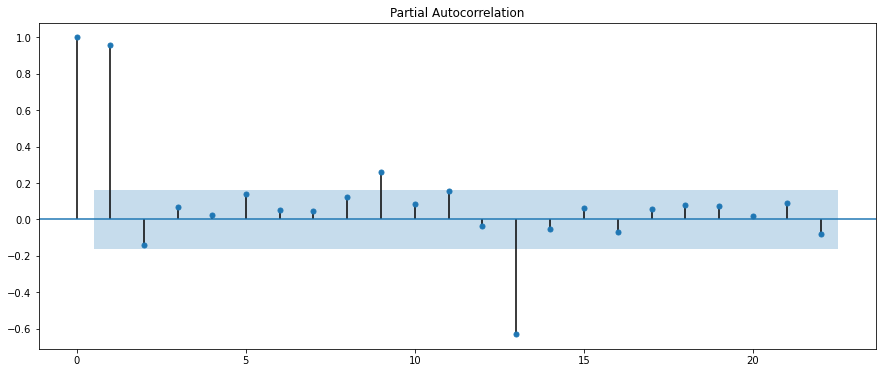

In [94]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


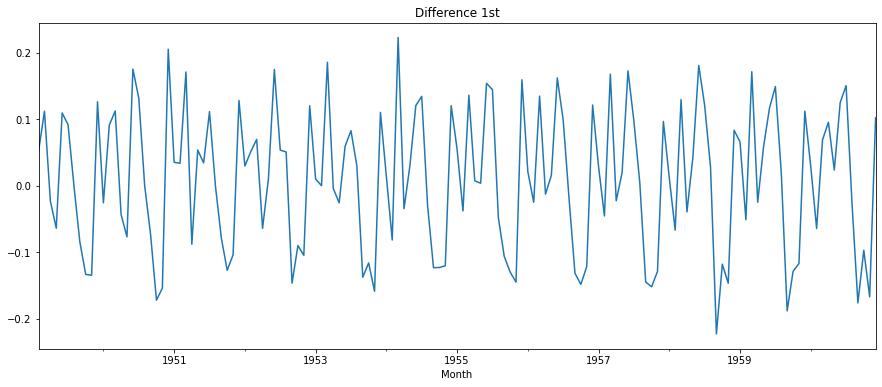

In [95]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


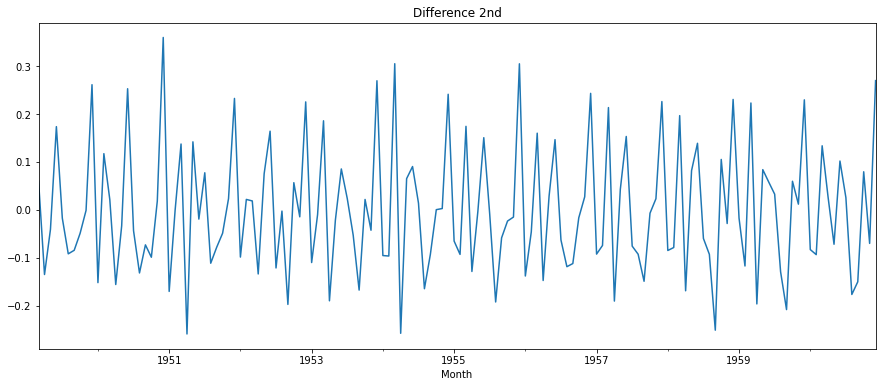

In [96]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

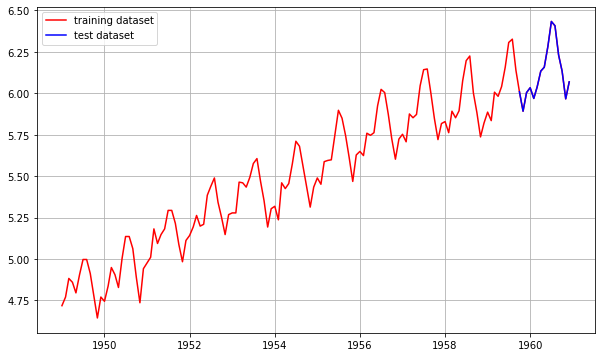

In [97]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [98]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Month
1949-01-01    4.718499
1949-02-01    4.770685
Name: Passengers, dtype: float64
(129,)
(15,)


In [107]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 8))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  128
Model:                 ARIMA(1, 1, 8)   Log Likelihood                 143.430
Method:                       css-mle   S.D. of innovations              0.075
Date:                Thu, 13 Aug 2020   AIC                           -264.860
Time:                        17:53:10   BIC                           -233.488
Sample:                    02-01-1949   HQIC                          -252.113
                         - 09-01-1959                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0100      0.003      3.265      0.001       0.004       0.016
ar.L1.D.Passengers     0.0533      0.128      0.418      0.676      -0.197       0.303
ma.L1.D.Passengers  

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


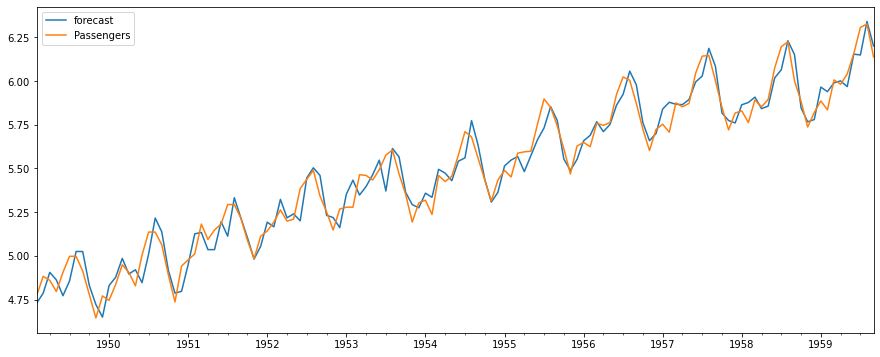

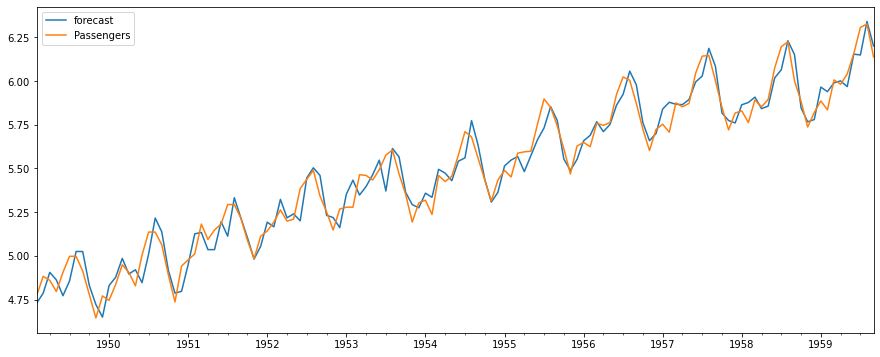

In [108]:
fitted_m.plot_predict()

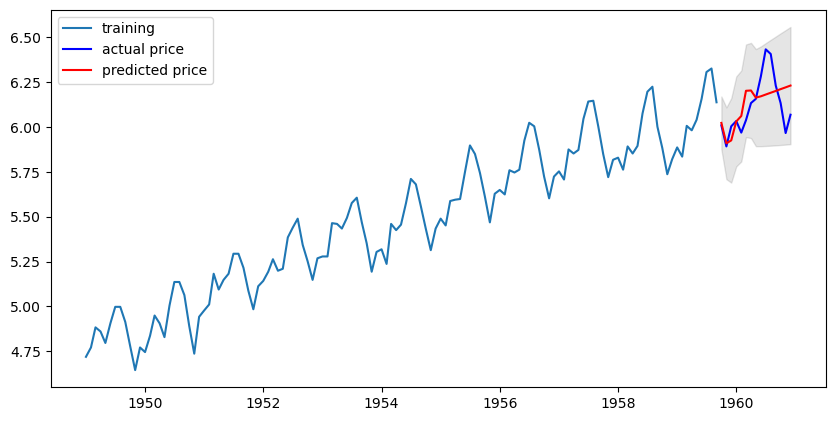

In [109]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  4374.188937697499
MAE:  49.788570634899294
RMSE:  66.13765143772115
MAPE: 10.42%


## 삼성바이오

In [111]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/005930.KS.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Date    Open    High     Low   Close  Adj Close      Volume
0  2000-01-04  6000.0  6110.0  5660.0  6110.0   0.090599  74195000.0
1  2000-01-05  5800.0  6060.0  5520.0  5580.0   0.082740  74680000.0
2  2000-01-06  5750.0  5780.0  5580.0  5620.0   0.083333  54390000.0
3  2000-01-07  5560.0  5670.0  5360.0  5540.0   0.082147  40305000.0
4  2000-01-10  5600.0  5770.0  5580.0  5770.0   0.085558  46880000.0

In [112]:
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Open    High     Low   Close  Adj Close      Volume
Date                                                             
2000-01-04  6000.0  6110.0  5660.0  6110.0   0.090599  74195000.0
2000-01-05  5800.0  6060.0  5520.0  5580.0   0.082740  74680000.0
2000-01-06  5750.0  5780.0  5580.0  5620.0   0.083333  54390000.0
2000-01-07  5560.0  5670.0  5360.0  5540.0   0.082147  40305000.0
2000-01-10  5600.0  5770.0  5580.0  5770.0   0.085558  46880000.0

In [113]:
ts = df['Close']
print(type(ts1))
ts.head()

<class 'pandas.core.series.Series'>


Date
2000-01-04    6110.0
2000-01-05    5580.0
2000-01-06    5620.0
2000-01-07    5540.0
2000-01-10    5770.0
Name: Close, dtype: float64

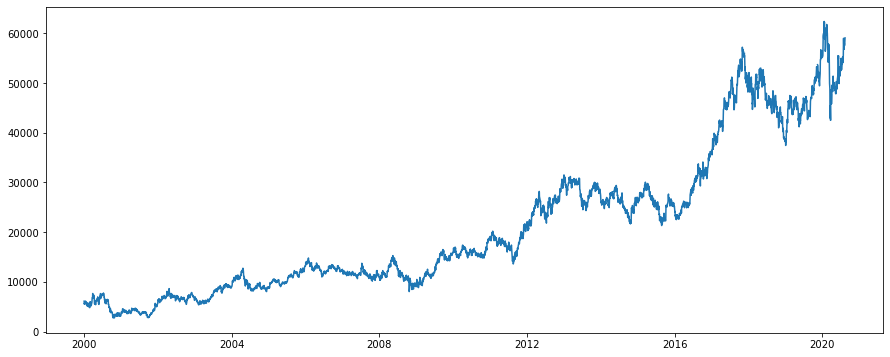

In [114]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

# time series 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts)

In [115]:
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Date
2000-12-25   NaN
2001-01-23   NaN
2001-01-24   NaN
2001-01-25   NaN
2001-03-14   NaN
2005-01-03   NaN
2017-11-16   NaN
2017-11-23   NaN
2018-01-02   NaN
2018-11-15   NaN
2019-11-14   NaN
Name: Close, dtype: float64

In [116]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts=ts.interpolate(method='time')
ts[ts.isna()]    # 다시 NaN 확인

Series([], Name: Close, dtype: float64)

In [117]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


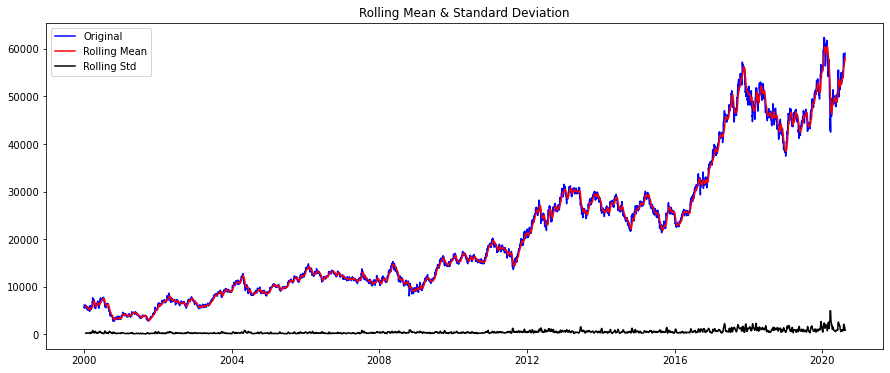

In [118]:
plot_rolling_statistics(ts, window=12)

In [119]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [120]:
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                    0.638261
p-value                           0.988522
#Lags Used                       26.000000
Number of Observations Used    5160.000000
Critical Value (1%)              -3.431618
Critical Value (5%)              -2.862100
Critical Value (10%)             -2.567068
dtype: float64


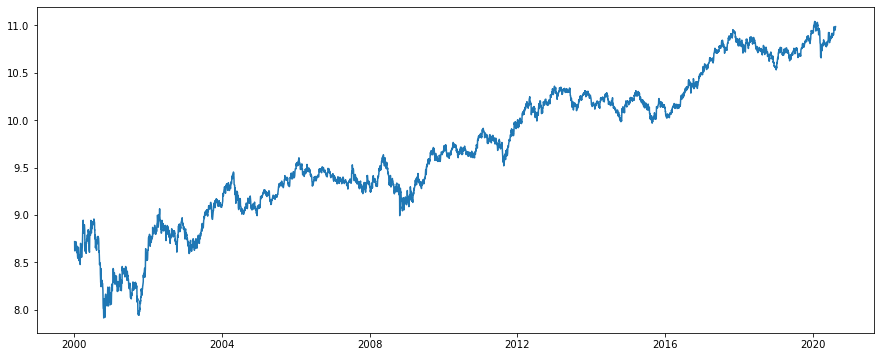

In [121]:
ts_log = np.log(ts)
plt.plot(ts_log)

In [122]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                   -0.679939
p-value                           0.851878
#Lags Used                        4.000000
Number of Observations Used    5182.000000
Critical Value (1%)              -3.431613
Critical Value (5%)              -2.862098
Critical Value (10%)             -2.567067
dtype: float64


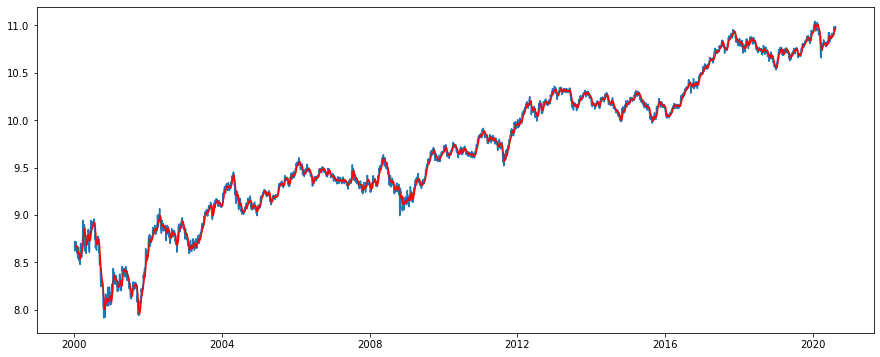

In [125]:
moving_avg = ts_log.rolling(window=12).mean()  # moving average를 구해서 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [126]:
ts_log_moving_avg = ts_log - moving_avg
ts_log_moving_avg.head(15)

Date
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-10         NaN
2000-01-11         NaN
2000-01-12         NaN
2000-01-13         NaN
2000-01-14         NaN
2000-01-17         NaN
2000-01-18         NaN
2000-01-19    0.024767
2000-01-20    0.039061
2000-01-21    0.007850
2000-01-24   -0.024419
Name: Close, dtype: float64

In [127]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Date
2000-01-19    0.024767
2000-01-20    0.039061
2000-01-21    0.007850
2000-01-24   -0.024419
2000-01-25   -0.069588
2000-01-26   -0.057965
2000-01-27   -0.047001
2000-01-28    0.004477
2000-01-31   -0.035715
2000-02-01   -0.075802
2000-02-02   -0.076542
2000-02-03   -0.085232
2000-02-04   -0.072735
2000-02-07   -0.039679
2000-02-08    0.002573
Name: Close, dtype: float64

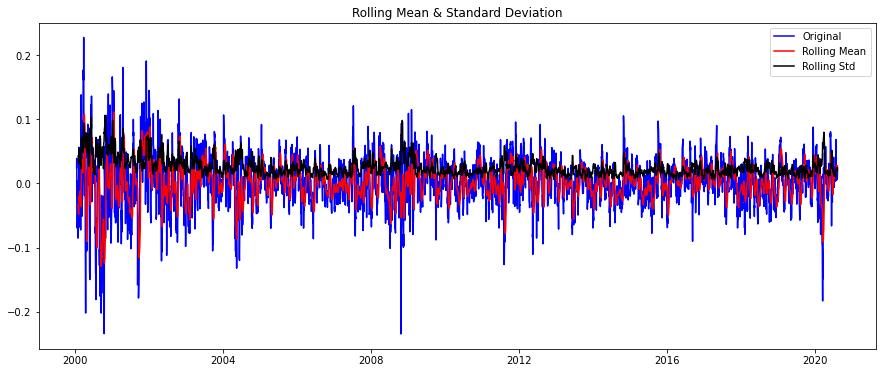

In [128]:
plot_rolling_statistics(ts_log_moving_avg)

In [129]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                -1.649004e+01
p-value                        2.196660e-29
#Lags Used                     1.100000e+01
Number of Observations Used    5.164000e+03
Critical Value (1%)           -3.431617e+00
Critical Value (5%)           -2.862100e+00
Critical Value (10%)          -2.567068e+00
dtype: float64


In [130]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)

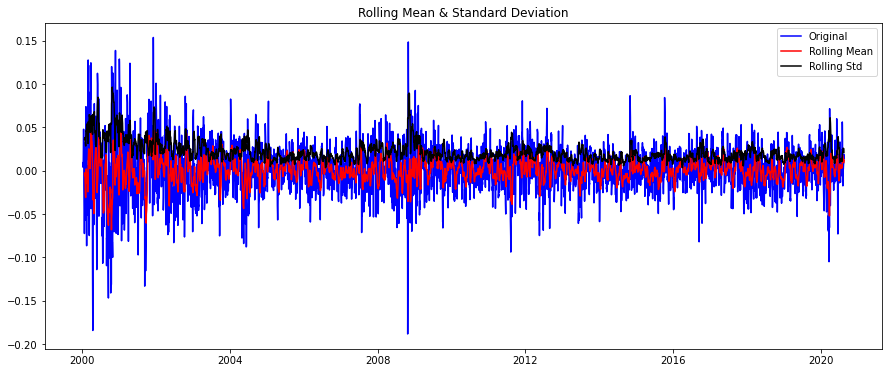

In [131]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [132]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                  -24.620698
p-value                           0.000000
#Lags Used                        6.000000
Number of Observations Used    5175.000000
Critical Value (1%)              -3.431614
Critical Value (5%)              -2.862099
Critical Value (10%)             -2.567067
dtype: float64


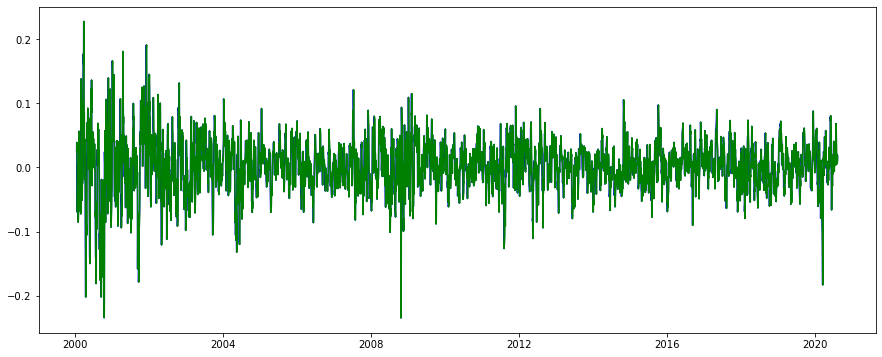

In [133]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

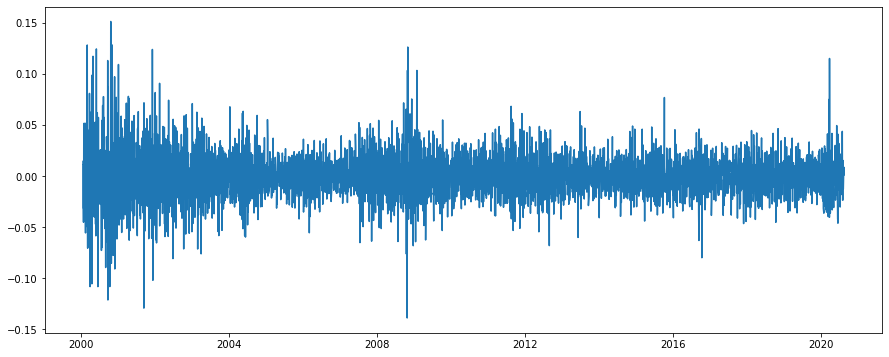

In [134]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

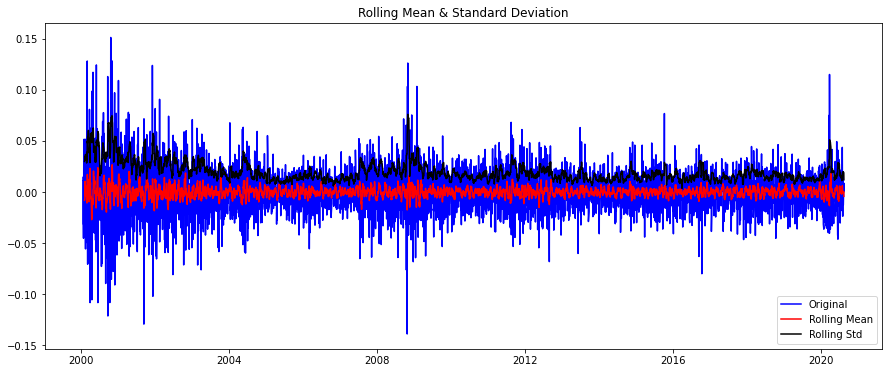

In [135]:
plot_rolling_statistics(ts_log_moving_avg_diff)

In [136]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -19.503569
p-value                           0.000000
#Lags Used                       33.000000
Number of Observations Used    5141.000000
Critical Value (1%)              -3.431623
Critical Value (5%)              -2.862102
Critical Value (10%)             -2.567069
dtype: float64


In [137]:
ts_log.head()

Date
2000-01-04    8.717682
2000-01-05    8.626944
2000-01-06    8.634087
2000-01-07    8.619750
2000-01-10    8.660427
Name: Close, dtype: float64

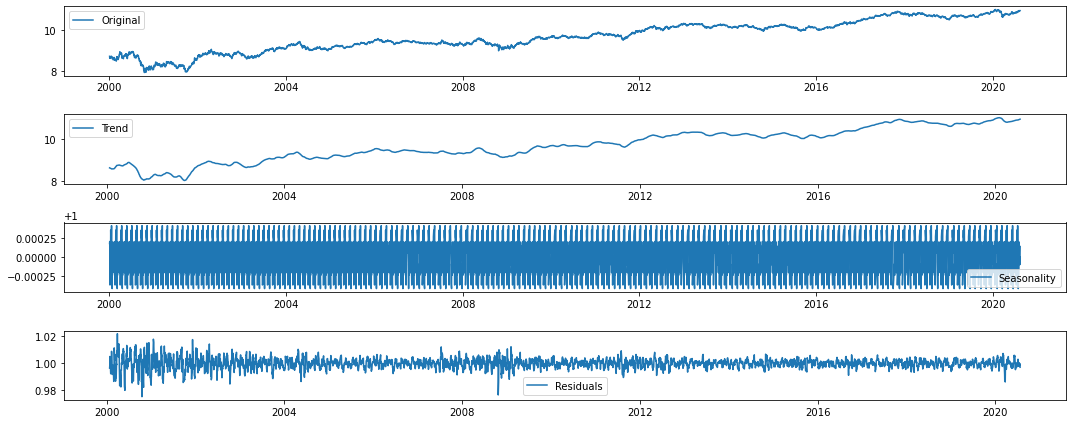

In [138]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


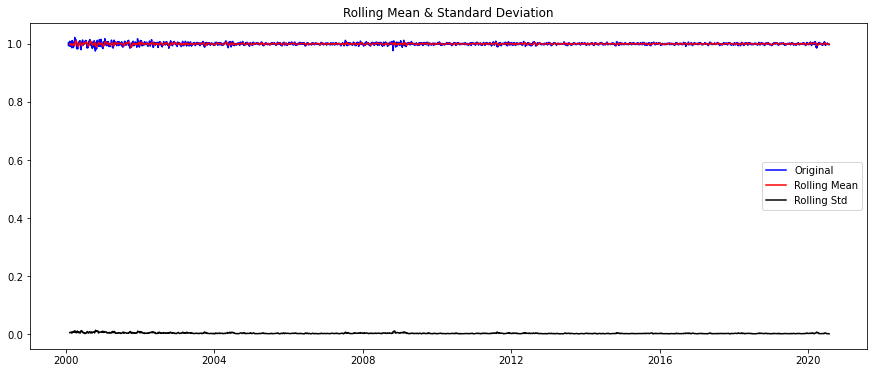

In [139]:
plot_rolling_statistics(residual)

In [140]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.728530e+01
p-value                        5.748601e-30
#Lags Used                     3.300000e+01
Number of Observations Used    5.123000e+03
Critical Value (1%)           -3.431627e+00
Critical Value (5%)           -2.862104e+00
Critical Value (10%)          -2.567070e+00
dtype: float64


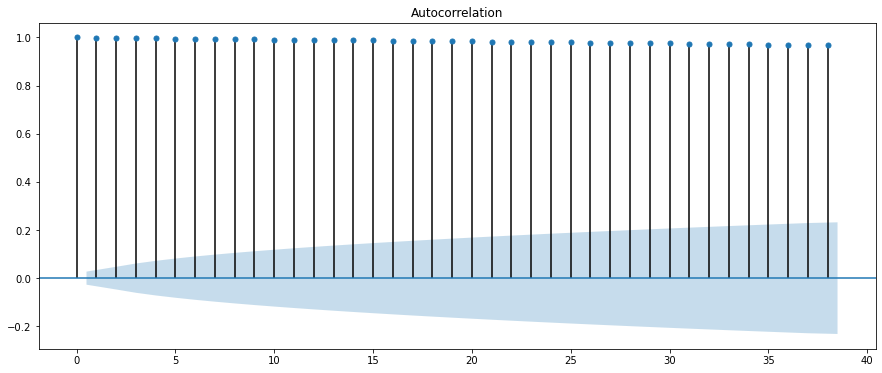

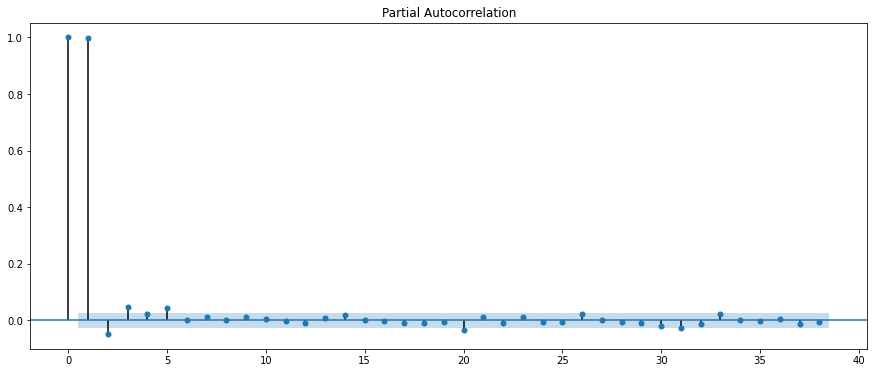

In [141]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -39.816723
p-value                           0.000000
#Lags Used                        3.000000
Number of Observations Used    5182.000000
Critical Value (1%)              -3.431613
Critical Value (5%)              -2.862098
Critical Value (10%)             -2.567067
dtype: float64


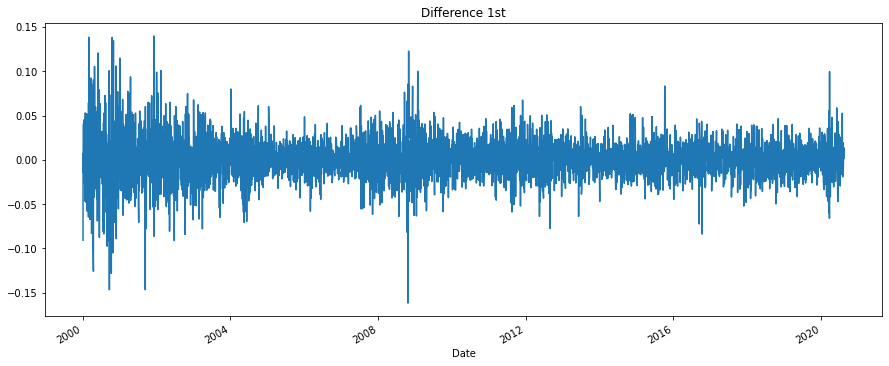

In [142]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                  -21.583101
p-value                           0.000000
#Lags Used                       33.000000
Number of Observations Used    5151.000000
Critical Value (1%)              -3.431620
Critical Value (5%)              -2.862101
Critical Value (10%)             -2.567069
dtype: float64


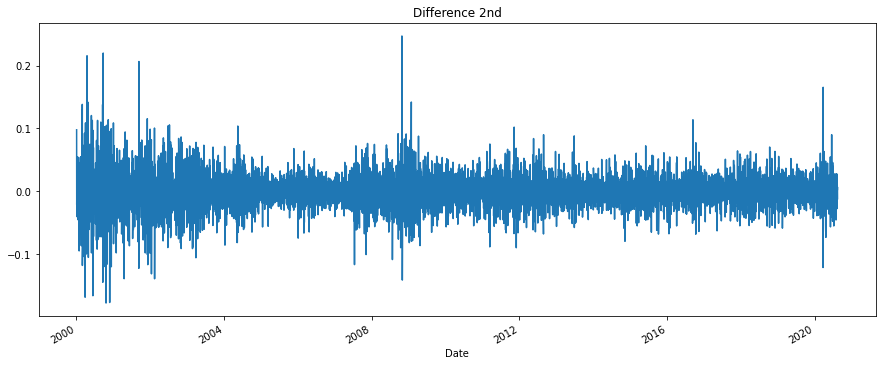

In [143]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

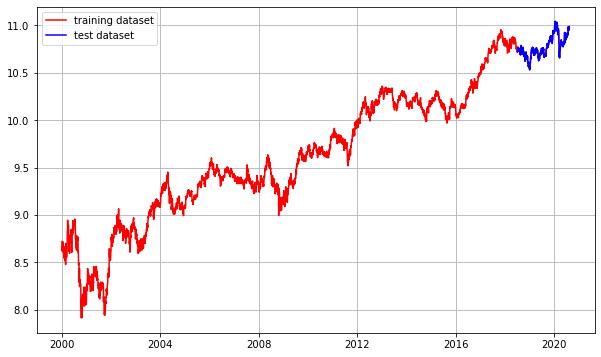

In [144]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [145]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2000-01-04    8.717682
2000-01-05    8.626944
Name: Close, dtype: float64
(4668,)
(519,)


In [146]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4667
Model:                 ARIMA(1, 1, 0)   Log Likelihood               10983.285
Method:                       css-mle   S.D. of innovations              0.023
Date:                Thu, 13 Aug 2020   AIC                         -21960.569
Time:                        17:55:23   BIC                         -21941.224
Sample:                             1   HQIC                        -21953.765
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0004      0.000      1.205      0.228      -0.000       0.001
ar.L1.D.Close     0.0478      0.015      3.262      0.001       0.019       0.076
                                    Root

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


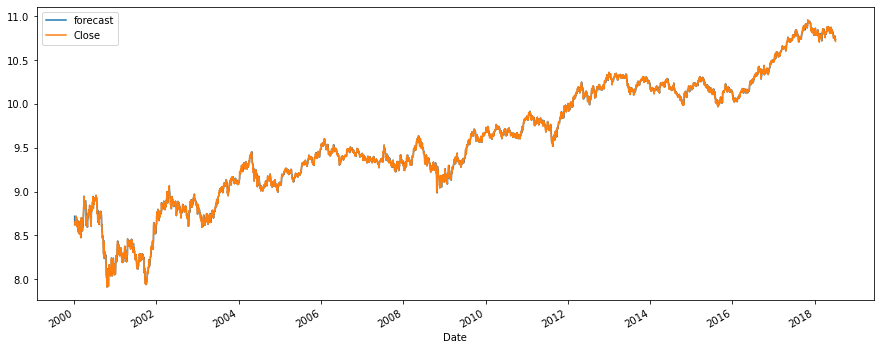

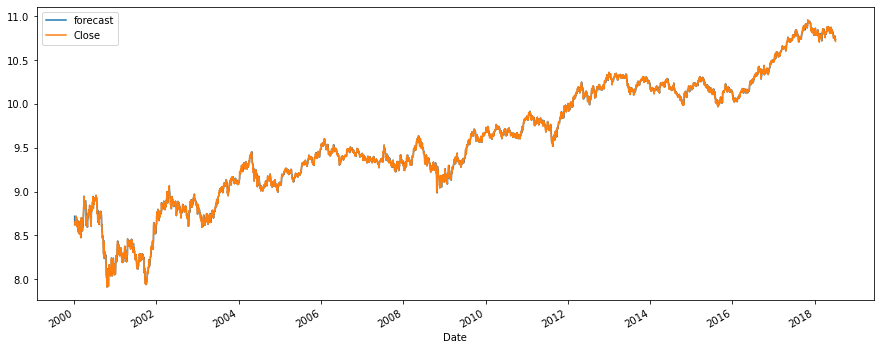

In [147]:
fitted_m.plot_predict()

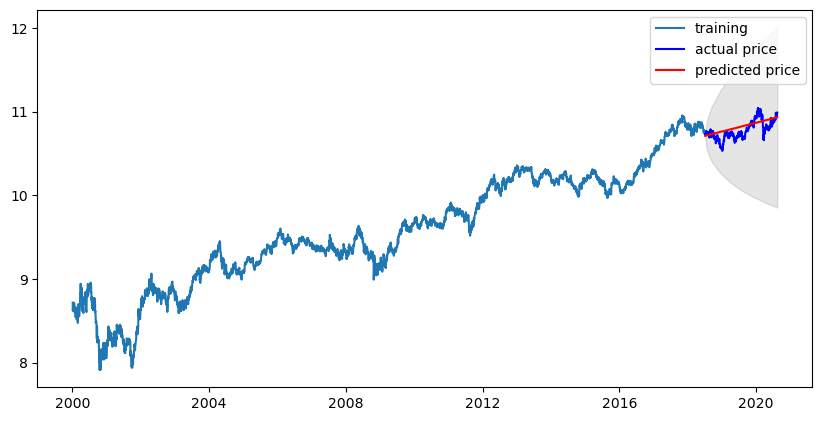

In [148]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [149]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  18522409.431084756
MAE:  3590.960714790428
RMSE:  4303.766888562246
MAPE: 7.68%


### sk hynics


In [150]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/000660.KS.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Date    Open    High     Low   Close    Adj Close      Volume
0  2004-01-05  5610.0  6360.0  5560.0  6250.0  4432.511230  18766500.0
1  2004-01-06  6380.0  6470.0  6070.0  6130.0  4347.407227  10501100.0
2  2004-01-07  6280.0  6850.0  6230.0  6620.0  4694.915527  20562400.0
3  2004-01-08  6800.0  6970.0  6500.0  6510.0  4616.903809  13864000.0
4  2004-01-09  7000.0  7470.0  6900.0  7160.0  5077.884277  19633800.0

In [151]:
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Open    High     Low   Close    Adj Close      Volume
Date                                                               
2004-01-05  5610.0  6360.0  5560.0  6250.0  4432.511230  18766500.0
2004-01-06  6380.0  6470.0  6070.0  6130.0  4347.407227  10501100.0
2004-01-07  6280.0  6850.0  6230.0  6620.0  4694.915527  20562400.0
2004-01-08  6800.0  6970.0  6500.0  6510.0  4616.903809  13864000.0
2004-01-09  7000.0  7470.0  6900.0  7160.0  5077.884277  19633800.0

In [152]:
ts = df['Close']
print(type(ts))
ts.head()

<class 'pandas.core.series.Series'>


Date
2004-01-05    6250.0
2004-01-06    6130.0
2004-01-07    6620.0
2004-01-08    6510.0
2004-01-09    7160.0
Name: Close, dtype: float64

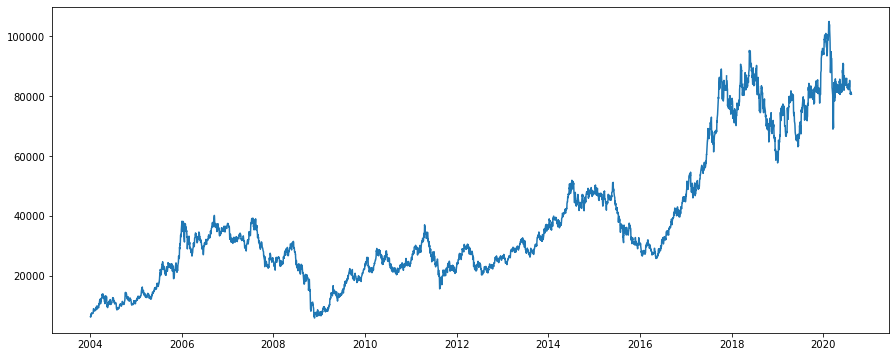

In [153]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

# time series 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts)

In [154]:
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Date
2005-01-03   NaN
2017-11-16   NaN
2017-11-23   NaN
2018-01-02   NaN
2018-11-15   NaN
2019-11-14   NaN
Name: Close, dtype: float64

In [155]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts=ts.interpolate(method='time')
ts[ts.isna()]    # 다시 NaN 확인

Series([], Name: Close, dtype: float64)

In [156]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


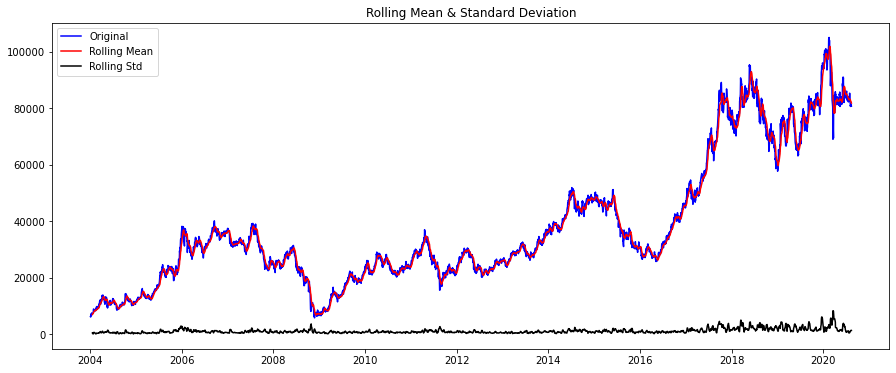

In [157]:
plot_rolling_statistics(ts, window=12)

In [158]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [159]:
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                   -0.869419
p-value                           0.797876
#Lags Used                       24.000000
Number of Observations Used    4118.000000
Critical Value (1%)              -3.431939
Critical Value (5%)              -2.862242
Critical Value (10%)             -2.567144
dtype: float64


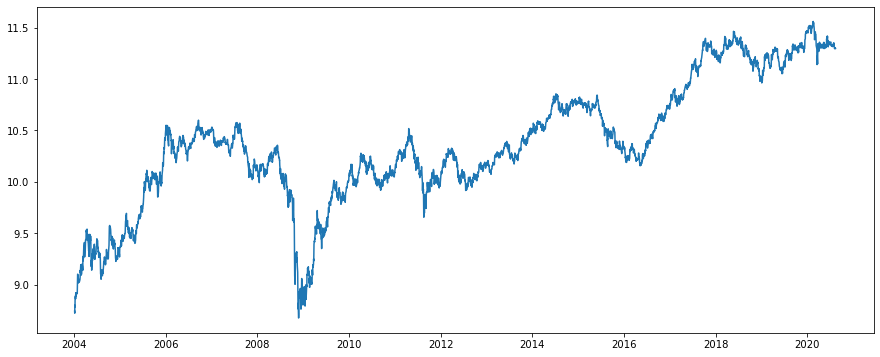

In [160]:
ts_log = np.log(ts)
plt.plot(ts_log)

In [161]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                   -2.027835
p-value                           0.274503
#Lags Used                        8.000000
Number of Observations Used    4134.000000
Critical Value (1%)              -3.431933
Critical Value (5%)              -2.862239
Critical Value (10%)             -2.567142
dtype: float64


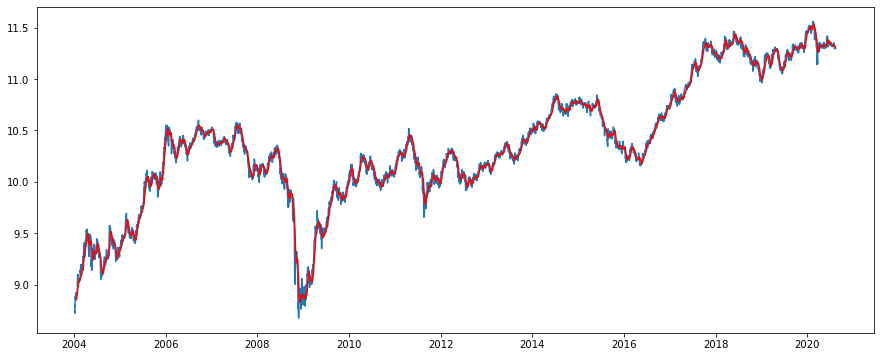

In [162]:
moving_avg = ts_log.rolling(window=12).mean()  # moving average를 구해서 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [163]:
ts_log_moving_avg = ts_log - moving_avg
ts_log_moving_avg.head(15)

Date
2004-01-05         NaN
2004-01-06         NaN
2004-01-07         NaN
2004-01-08         NaN
2004-01-09         NaN
2004-01-12         NaN
2004-01-13         NaN
2004-01-14         NaN
2004-01-15         NaN
2004-01-16         NaN
2004-01-19         NaN
2004-01-20    0.058469
2004-01-21    0.044394
2004-01-22    0.028704
2004-01-23    0.019422
Name: Close, dtype: float64

In [164]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Date
2004-01-20    0.058469
2004-01-21    0.044394
2004-01-22    0.028704
2004-01-23    0.019422
2004-01-26    0.011217
2004-01-27    0.068023
2004-01-28    0.148981
2004-01-29    0.156153
2004-01-30    0.140085
2004-02-02    0.109927
2004-02-03    0.038800
2004-02-04    0.059986
2004-02-05    0.009479
2004-02-06    0.022630
2004-02-09    0.012857
Name: Close, dtype: float64

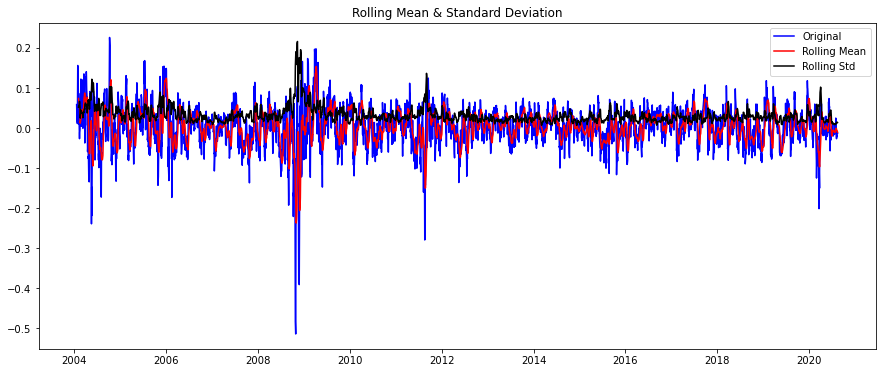

In [165]:
plot_rolling_statistics(ts_log_moving_avg)

In [166]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                -1.331146e+01
p-value                        6.733451e-25
#Lags Used                     1.100000e+01
Number of Observations Used    4.120000e+03
Critical Value (1%)           -3.431938e+00
Critical Value (5%)           -2.862242e+00
Critical Value (10%)          -2.567144e+00
dtype: float64


In [167]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)

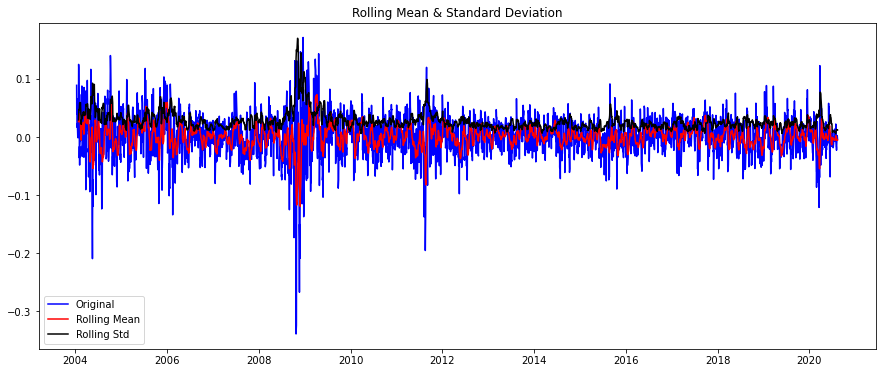

In [168]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [169]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                -1.159361e+01
p-value                        2.754112e-21
#Lags Used                     2.900000e+01
Number of Observations Used    4.108000e+03
Critical Value (1%)           -3.431943e+00
Critical Value (5%)           -2.862244e+00
Critical Value (10%)          -2.567145e+00
dtype: float64


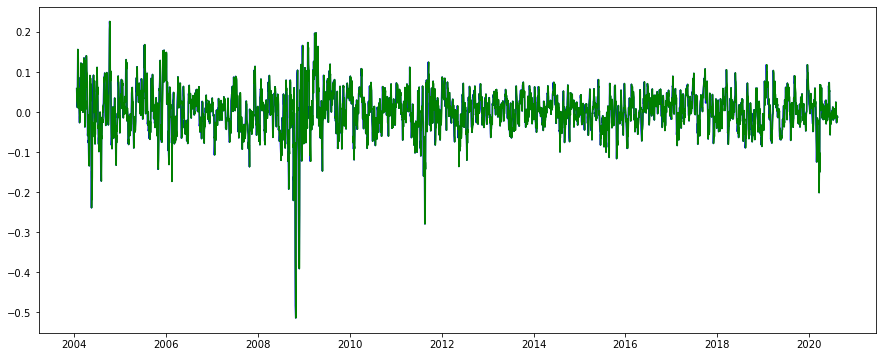

In [170]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

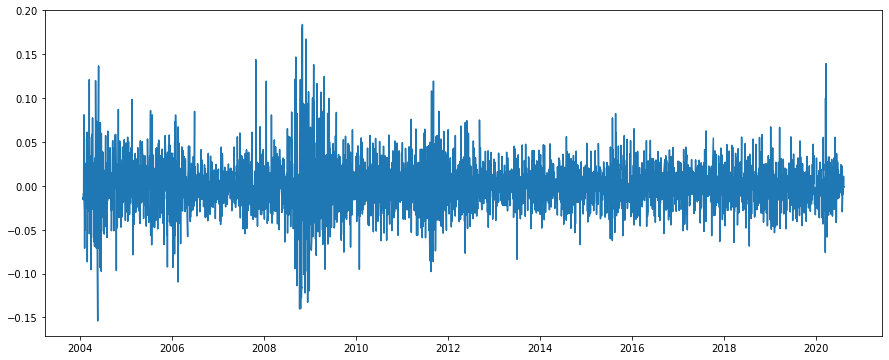

In [171]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

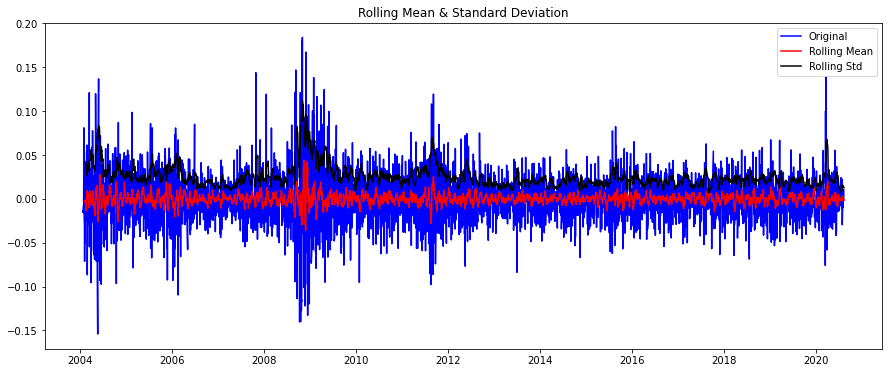

In [172]:
plot_rolling_statistics(ts_log_moving_avg_diff)

In [173]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                -1.821964e+01
p-value                        2.381602e-30
#Lags Used                     3.100000e+01
Number of Observations Used    4.099000e+03
Critical Value (1%)           -3.431946e+00
Critical Value (5%)           -2.862245e+00
Critical Value (10%)          -2.567145e+00
dtype: float64


In [174]:
ts_log.head()

Date
2004-01-05    8.740337
2004-01-06    8.720950
2004-01-07    8.797851
2004-01-08    8.781095
2004-01-09    8.876265
Name: Close, dtype: float64

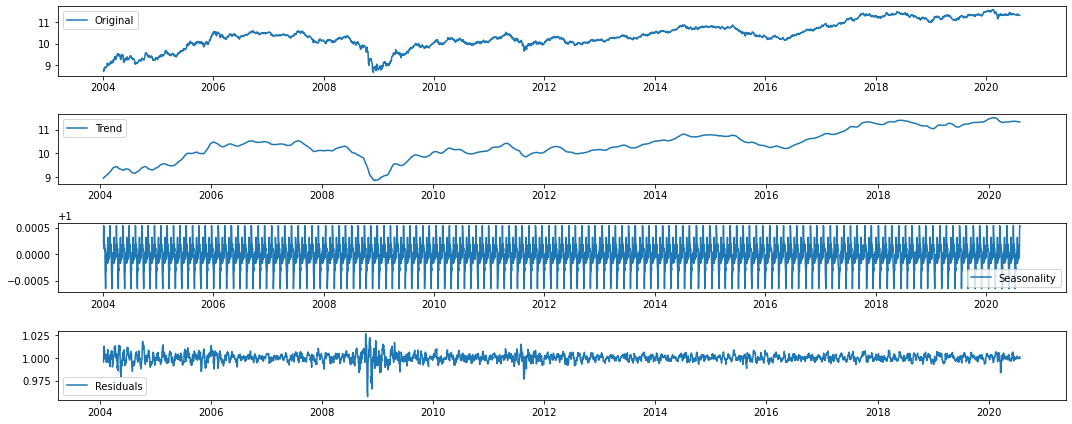

In [175]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


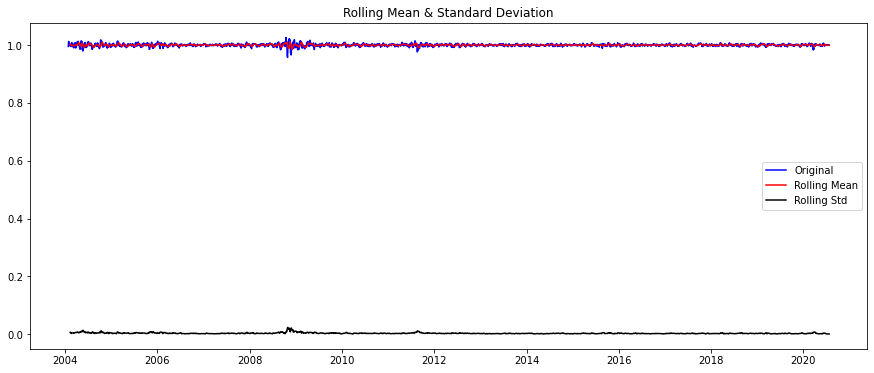

In [176]:
plot_rolling_statistics(residual)

In [177]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.682095e+01
p-value                        1.178422e-29
#Lags Used                     2.900000e+01
Number of Observations Used    4.083000e+03
Critical Value (1%)           -3.431953e+00
Critical Value (5%)           -2.862248e+00
Critical Value (10%)          -2.567147e+00
dtype: float64


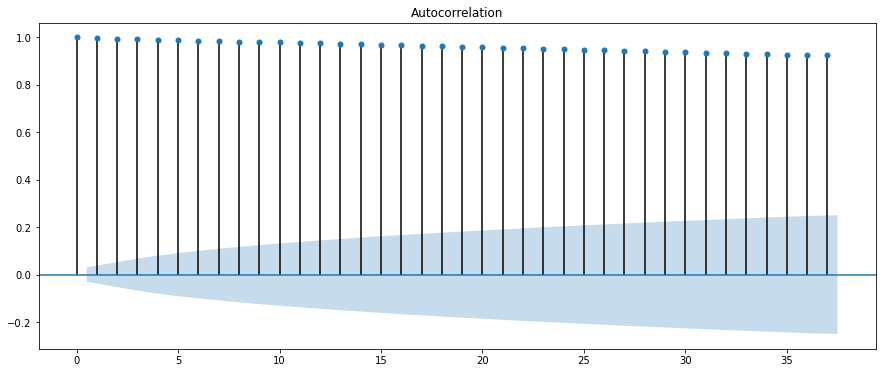

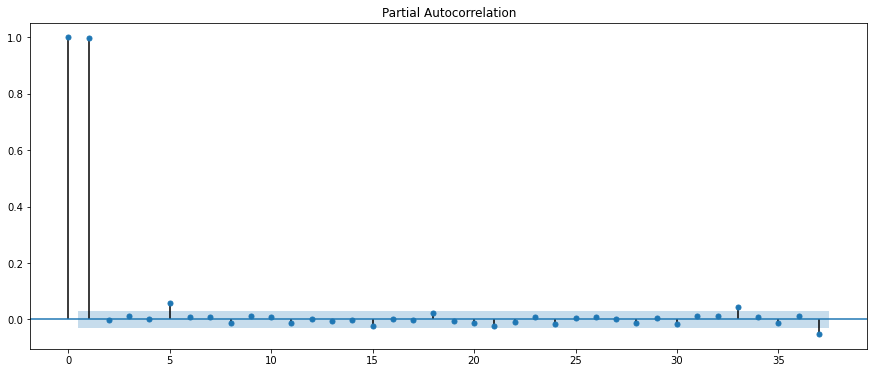

In [178]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.182417e+01
p-value                        8.278487e-22
#Lags Used                     3.100000e+01
Number of Observations Used    4.110000e+03
Critical Value (1%)           -3.431942e+00
Critical Value (5%)           -2.862243e+00
Critical Value (10%)          -2.567144e+00
dtype: float64


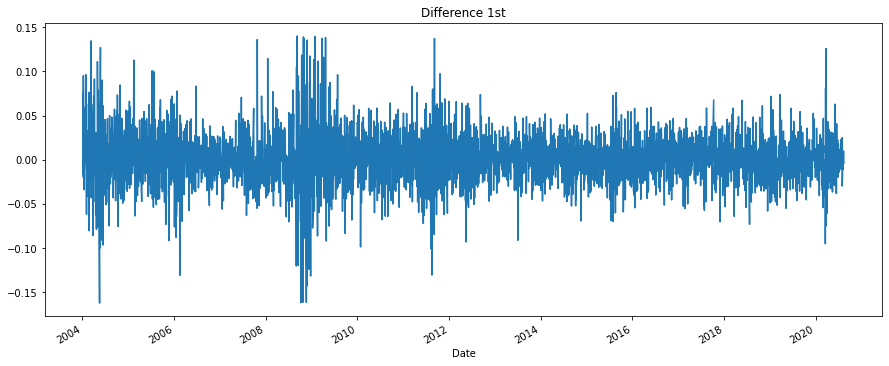

In [179]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.776651e+01
p-value                        3.321355e-30
#Lags Used                     3.100000e+01
Number of Observations Used    4.109000e+03
Critical Value (1%)           -3.431942e+00
Critical Value (5%)           -2.862244e+00
Critical Value (10%)          -2.567145e+00
dtype: float64


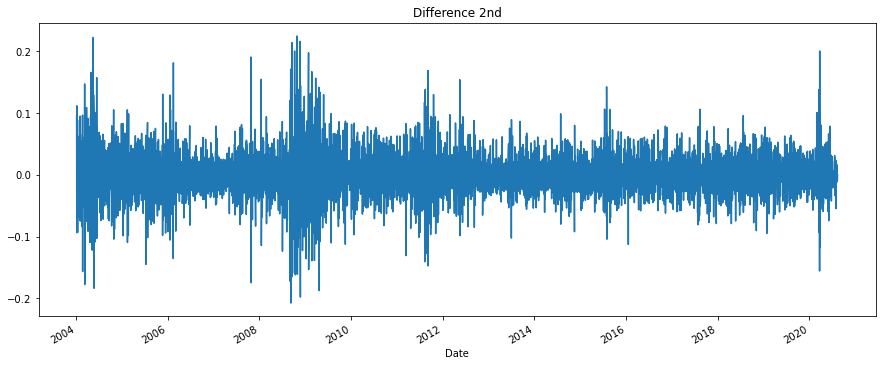

In [180]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

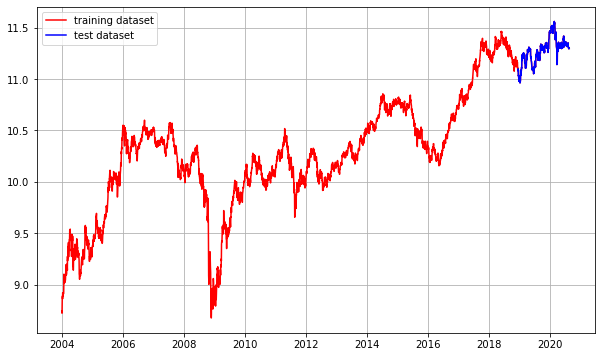

In [181]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [182]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2004-01-05    8.740337
2004-01-06    8.720950
Name: Close, dtype: float64
(3728,)
(415,)


In [183]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 8))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 3727
Model:                 ARIMA(1, 1, 8)   Log Likelihood                7830.598
Method:                       css-mle   S.D. of innovations              0.030
Date:                Thu, 13 Aug 2020   AIC                         -15639.197
Time:                        17:55:55   BIC                         -15570.740
Sample:                             1   HQIC                        -15614.843
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0006      0.000      1.447      0.148      -0.000       0.001
ar.L1.D.Close     0.1309      0.319      0.410      0.682      -0.494       0.756
ma.L1.D.Close    -0.1343      0.319     

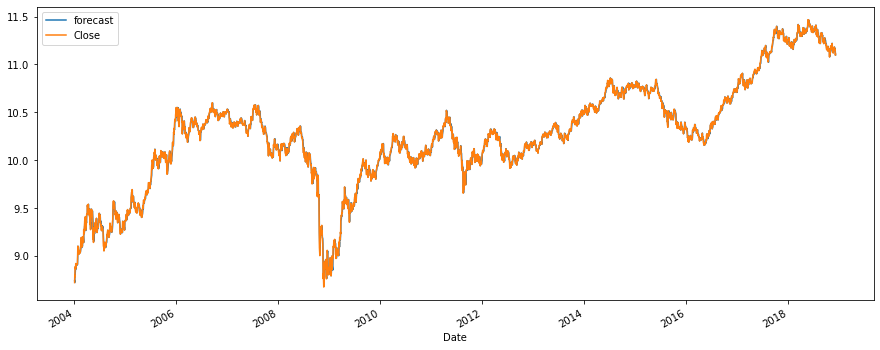

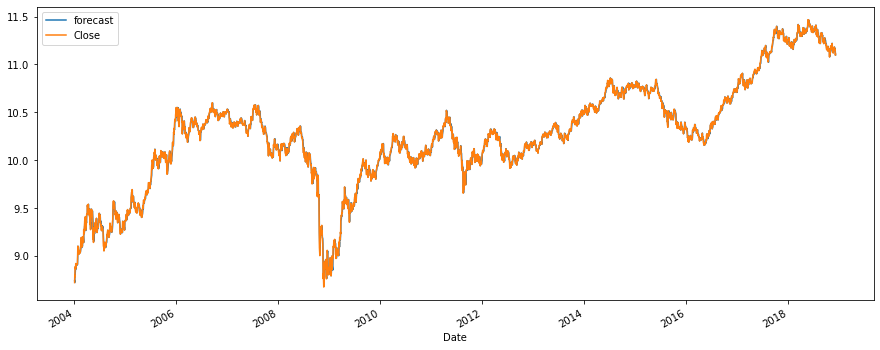

In [184]:
fitted_m.plot_predict()

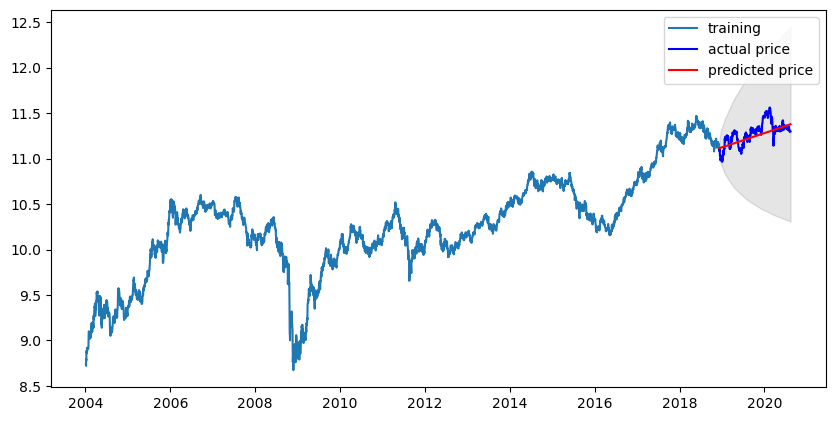

In [185]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [186]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  61438535.6331838
MAE:  5830.913915114841
RMSE:  7838.27376615437
MAPE: 7.06%


#skhynics도 대상 데이터를 2004년 이후로 변경 하여 mape를 증가 시켜으며 q=8로 진행시 더욱 향상 확인

### lg 화학

In [187]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/051910.KS.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Date     Open     High      Low    Close    Adj Close     Volume
0  2001-04-25  14500.0  14500.0  12350.0  13000.0  8733.928711  3094900.0
1  2001-04-26  14500.0  14500.0  12350.0  13000.0  8733.928711  3094900.0
2  2001-04-27  12150.0  12800.0  12000.0  12700.0  8532.374023   854300.0
3  2001-04-30  12450.0  12850.0  12450.0  12800.0  8599.558594   803200.0
4  2001-05-01      NaN      NaN      NaN      NaN          NaN        NaN

In [188]:
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Open     High      Low    Close    Adj Close     Volume
Date                                                                  
2001-04-25  14500.0  14500.0  12350.0  13000.0  8733.928711  3094900.0
2001-04-26  14500.0  14500.0  12350.0  13000.0  8733.928711  3094900.0
2001-04-27  12150.0  12800.0  12000.0  12700.0  8532.374023   854300.0
2001-04-30  12450.0  12850.0  12450.0  12800.0  8599.558594   803200.0
2001-05-01      NaN      NaN      NaN      NaN          NaN        NaN

In [189]:
ts = df['Close']
print(type(ts))
ts.head()

<class 'pandas.core.series.Series'>


Date
2001-04-25    13000.0
2001-04-26    13000.0
2001-04-27    12700.0
2001-04-30    12800.0
2001-05-01        NaN
Name: Close, dtype: float64

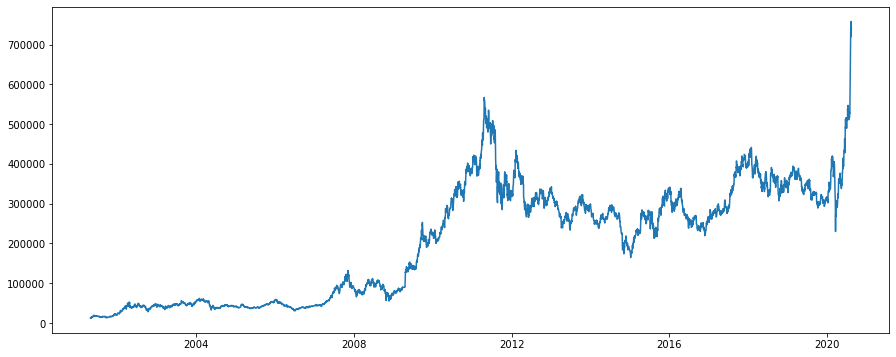

In [190]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

# time series 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts)

In [191]:
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Date
2001-05-01   NaN
2001-05-07   NaN
2001-06-06   NaN
2001-07-17   NaN
2001-08-15   NaN
2001-09-24   NaN
2001-09-28   NaN
2001-10-01   NaN
2001-10-02   NaN
2001-10-03   NaN
2001-11-09   NaN
2001-12-25   NaN
2001-12-31   NaN
2002-01-01   NaN
2002-01-03   NaN
2002-01-31   NaN
2002-02-11   NaN
2002-02-12   NaN
2002-02-13   NaN
2002-03-01   NaN
2002-04-05   NaN
2002-05-01   NaN
2002-06-06   NaN
2002-06-13   NaN
2002-07-01   NaN
2002-07-17   NaN
2002-08-15   NaN
2002-08-23   NaN
2002-09-20   NaN
2002-10-03   NaN
2002-12-02   NaN
2002-12-19   NaN
2002-12-25   NaN
2002-12-31   NaN
2003-01-01   NaN
2003-01-31   NaN
2003-05-01   NaN
2003-05-05   NaN
2003-05-08   NaN
2003-06-06   NaN
2003-07-17   NaN
2003-08-15   NaN
2005-01-03   NaN
2017-11-16   NaN
2017-11-23   NaN
2018-01-02   NaN
2018-11-15   NaN
2019-11-14   NaN
Name: Close, dtype: float64

In [192]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts=ts.interpolate(method='time')
ts[ts.isna()]    # 다시 NaN 확인

Series([], Name: Close, dtype: float64)

In [193]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


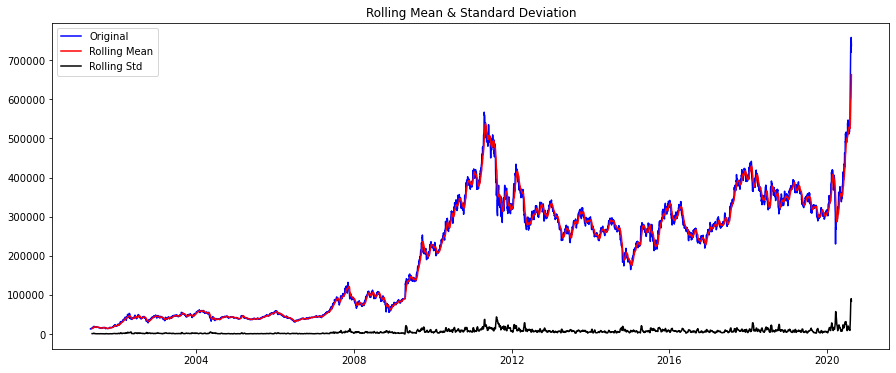

In [194]:
plot_rolling_statistics(ts, window=12)

In [195]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [196]:
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                    0.475254
p-value                           0.984101
#Lags Used                       25.000000
Number of Observations Used    4820.000000
Critical Value (1%)              -3.431707
Critical Value (5%)              -2.862140
Critical Value (10%)             -2.567089
dtype: float64


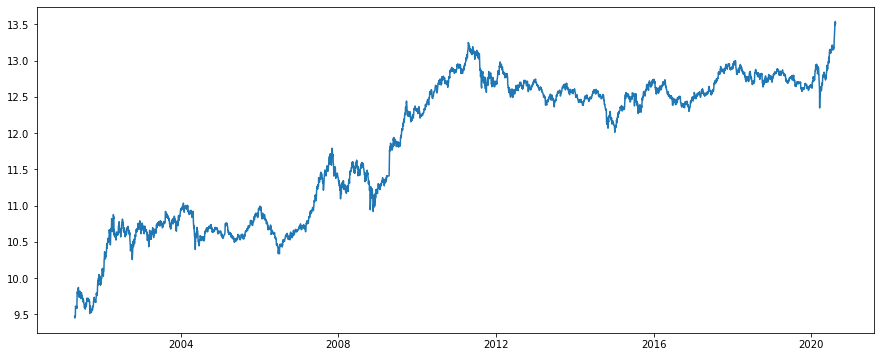

In [197]:
ts_log = np.log(ts)
plt.plot(ts_log)

In [198]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                   -1.509350
p-value                           0.528881
#Lags Used                        6.000000
Number of Observations Used    4839.000000
Critical Value (1%)              -3.431702
Critical Value (5%)              -2.862137
Critical Value (10%)             -2.567088
dtype: float64


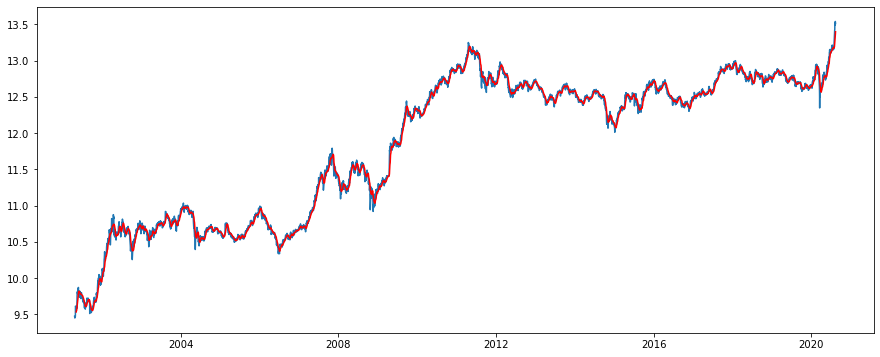

In [199]:
moving_avg = ts_log.rolling(window=12).mean()  # moving average를 구해서 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [200]:
ts_log_moving_avg = ts_log - moving_avg
ts_log_moving_avg.head(15)

Date
2001-04-25         NaN
2001-04-26         NaN
2001-04-27         NaN
2001-04-30         NaN
2001-05-01         NaN
2001-05-02         NaN
2001-05-03         NaN
2001-05-04         NaN
2001-05-07         NaN
2001-05-08         NaN
2001-05-09         NaN
2001-05-10    0.059467
2001-05-11    0.065020
2001-05-14    0.050571
2001-05-15    0.037538
Name: Close, dtype: float64

In [201]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Date
2001-05-10    0.059467
2001-05-11    0.065020
2001-05-14    0.050571
2001-05-15    0.037538
2001-05-16    0.003295
2001-05-17    0.063513
2001-05-18    0.153088
2001-05-21    0.175578
2001-05-22    0.135791
2001-05-23    0.150730
2001-05-24    0.142214
2001-05-25    0.143949
2001-05-28    0.119654
2001-05-29    0.094561
2001-05-30    0.096033
Name: Close, dtype: float64

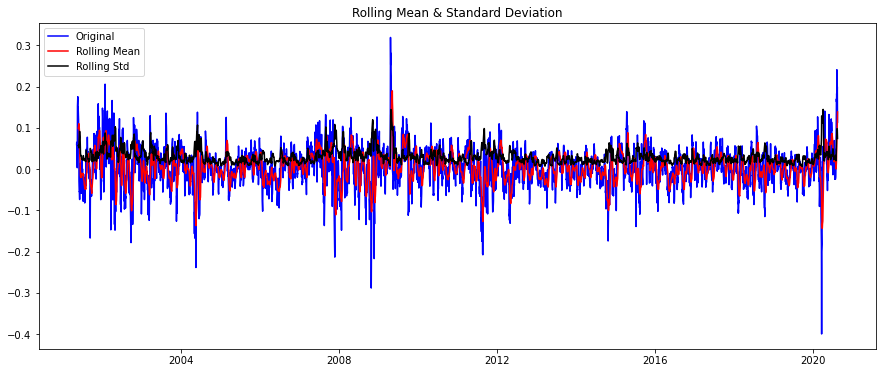

In [202]:
plot_rolling_statistics(ts_log_moving_avg)

In [203]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                -1.473405e+01
p-value                        2.632358e-27
#Lags Used                     1.300000e+01
Number of Observations Used    4.821000e+03
Critical Value (1%)           -3.431707e+00
Critical Value (5%)           -2.862140e+00
Critical Value (10%)          -2.567089e+00
dtype: float64


In [204]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)

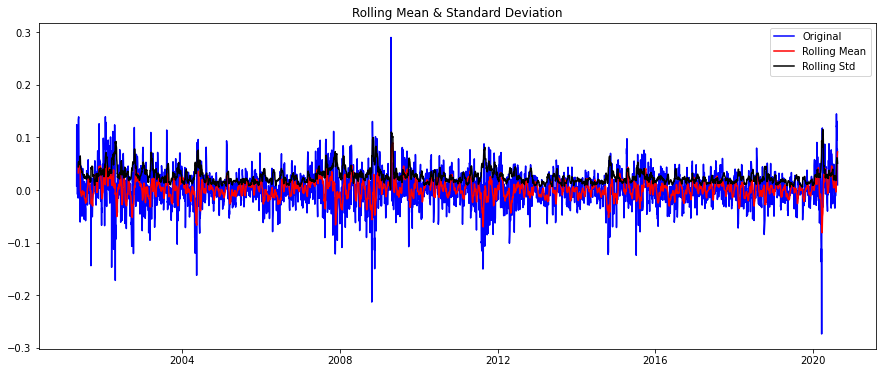

In [205]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [206]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                -1.766667e+01
p-value                        3.660914e-30
#Lags Used                     1.000000e+01
Number of Observations Used    4.830000e+03
Critical Value (1%)           -3.431705e+00
Critical Value (5%)           -2.862139e+00
Critical Value (10%)          -2.567089e+00
dtype: float64


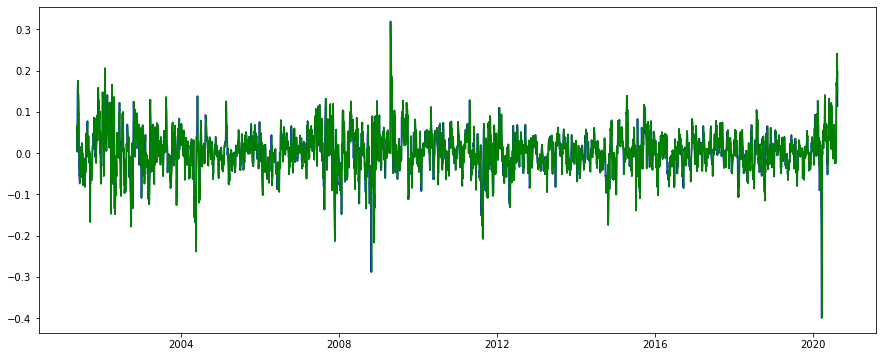

In [207]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

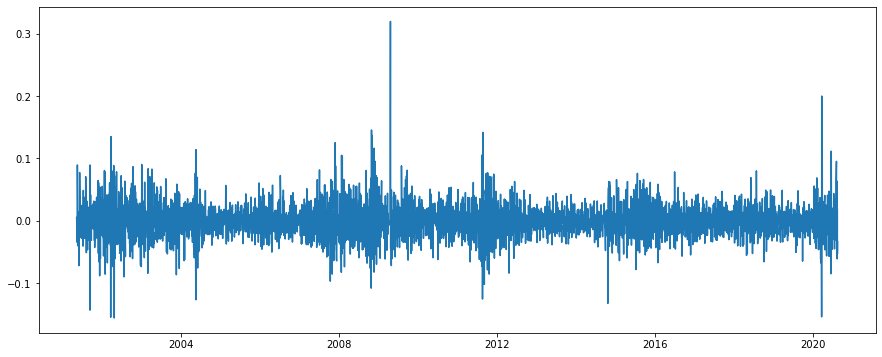

In [208]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

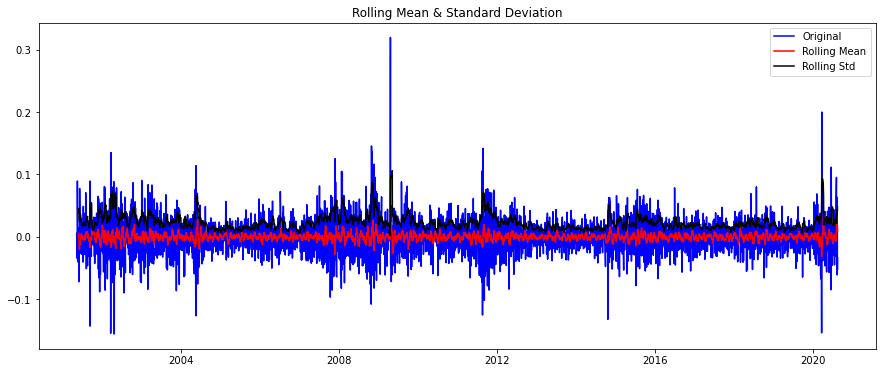

In [209]:
plot_rolling_statistics(ts_log_moving_avg_diff)

In [210]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -20.613435
p-value                           0.000000
#Lags Used                       30.000000
Number of Observations Used    4803.000000
Critical Value (1%)              -3.431712
Critical Value (5%)              -2.862142
Critical Value (10%)             -2.567090
dtype: float64


In [211]:
ts_log.head()

Date
2001-04-25    9.472705
2001-04-26    9.472705
2001-04-27    9.449357
2001-04-30    9.457200
2001-05-01    9.464983
Name: Close, dtype: float64

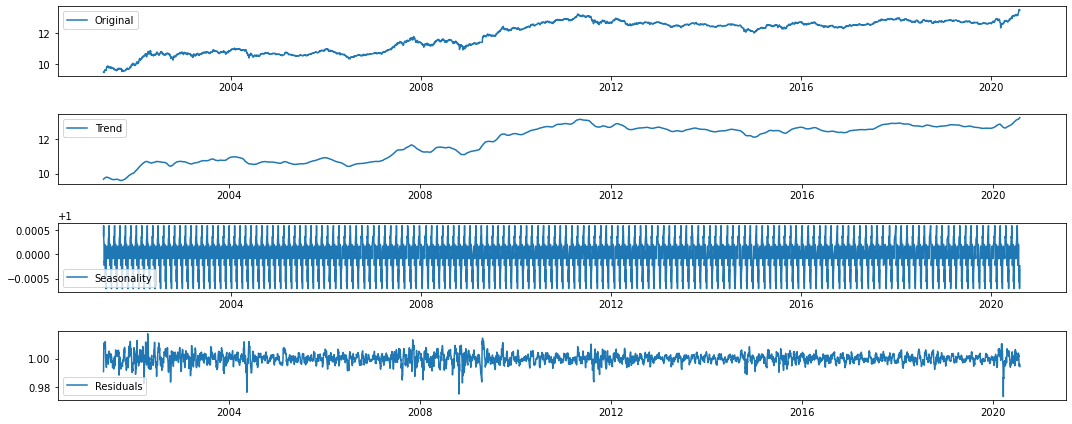

In [212]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


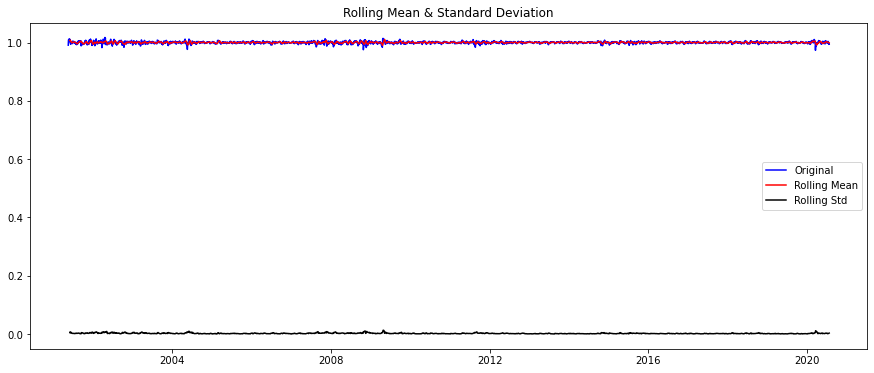

In [213]:
plot_rolling_statistics(residual)

In [214]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -19.757957
p-value                           0.000000
#Lags Used                       24.000000
Number of Observations Used    4791.000000
Critical Value (1%)              -3.431716
Critical Value (5%)              -2.862143
Critical Value (10%)             -2.567091
dtype: float64


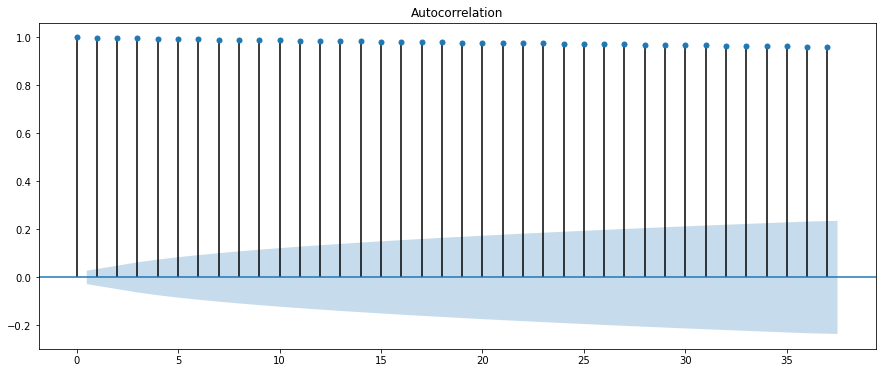

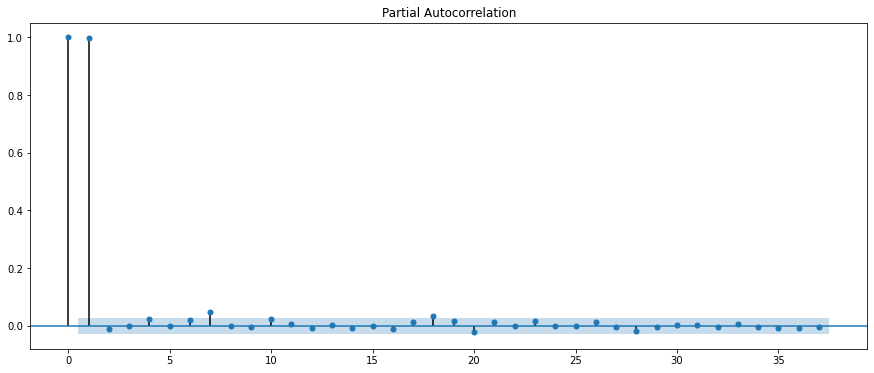

In [215]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -30.802517
p-value                           0.000000
#Lags Used                        5.000000
Number of Observations Used    4839.000000
Critical Value (1%)              -3.431702
Critical Value (5%)              -2.862137
Critical Value (10%)             -2.567088
dtype: float64


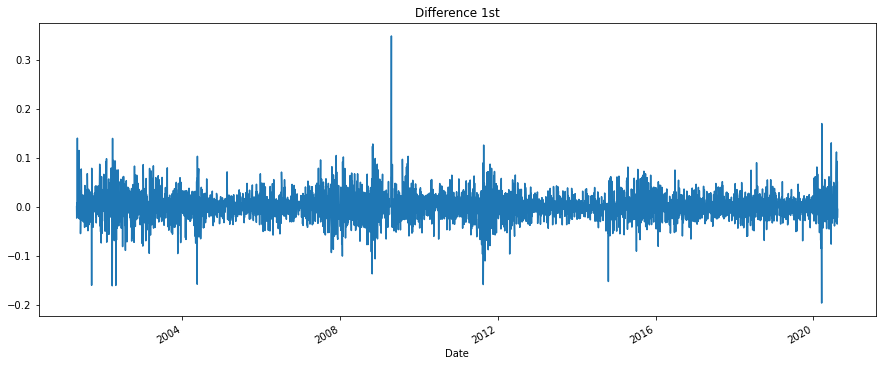

In [216]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                  -21.404399
p-value                           0.000000
#Lags Used                       32.000000
Number of Observations Used    4811.000000
Critical Value (1%)              -3.431710
Critical Value (5%)              -2.862141
Critical Value (10%)             -2.567090
dtype: float64


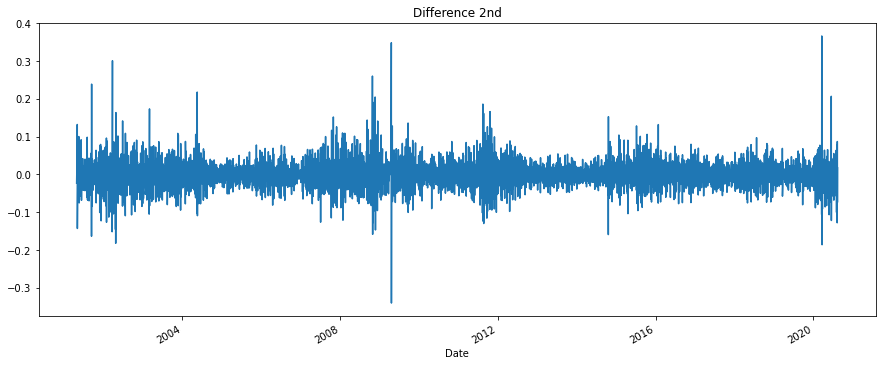

In [217]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

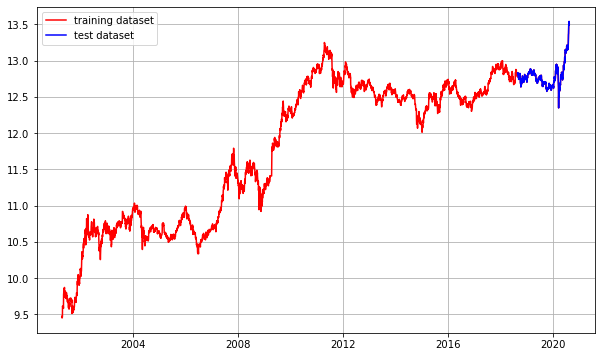

In [218]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [219]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2001-04-25    9.472705
2001-04-26    9.472705
Name: Close, dtype: float64
(4361,)
(485,)


In [220]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4360
Model:                 ARIMA(1, 1, 0)   Log Likelihood                9566.897
Method:                       css-mle   S.D. of innovations              0.027
Date:                Thu, 13 Aug 2020   AIC                         -19127.795
Time:                        17:56:18   BIC                         -19108.654
Sample:                             1   HQIC                        -19121.039
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0008      0.000      1.812      0.070   -6.26e-05       0.002
ar.L1.D.Close     0.0337      0.015      2.226      0.026       0.004       0.063
                                    Root

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


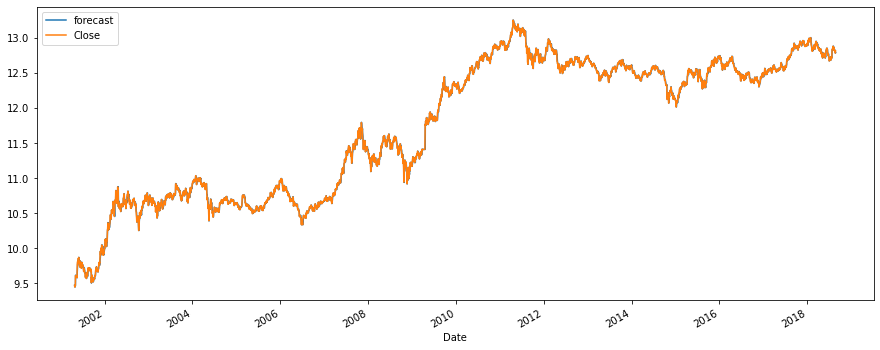

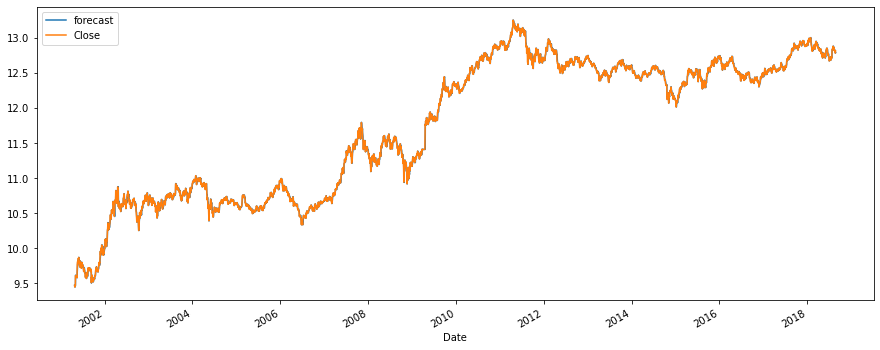

In [221]:
fitted_m.plot_predict()

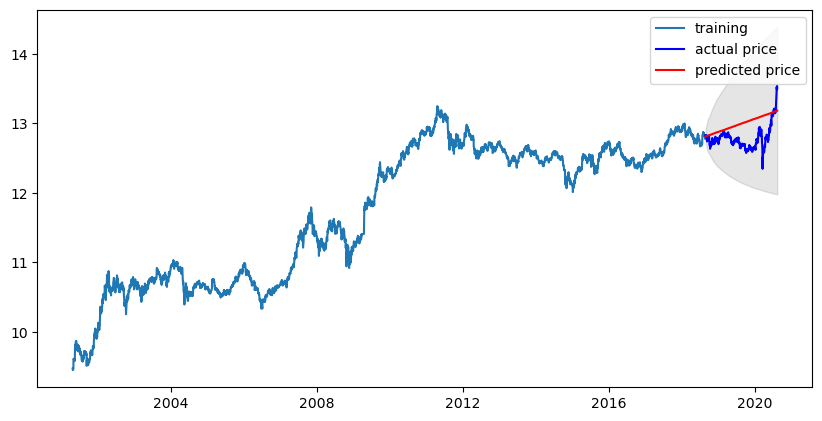

In [222]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [223]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  10876293442.844343
MAE:  87146.57097902412
RMSE:  104289.46947244646
MAPE: 25.79%
